1. Объясните, почему коэффициенты всех построенных моделей сильно отличаются между собой.


2. Сравните скорость и качество обучения моделей регрессии с помощью обычного и стохастического градиентного спуска на наборе данных housing.csv.

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split


df = pd.read_csv('housing.csv')

X = df.drop('Y', axis=1)
y = df['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Columns: 104 entries, Column1 to Column104
dtypes: float64(104)
memory usage: 411.3 KB


In [38]:
class LinearRegressionGD:
    def __init__(self, lr=0.01, max_iter=1000, tol=1e-3, intercept = True):
        # скорость обучения градиентного спуска
        self.learning_rate = lr 
        # максимальное число итераций
        self.max_iteration = max_iter 
        # критерий сходимости  
        self.tolerance_convergence  = tol
        # наличие свободного члена
        self.intercept = intercept
        # инициальзация весов: None
        self.theta = None
        self.n = None
        self.d = None
         
    def fit(self, X, y):
        self.X = X.to_numpy().copy()
        if self.intercept:
            self.X = np.hstack((np.ones((self.X.shape[0], 1)), self.X))   
        # размерность вектора X 
        self.n, self.d = self.X.shape
        # инициализация случайных весов
        self.theta = np.random.randn(self.d)
        steps, errors = [], []
        step = 0
        for _ in range(self.max_iteration):
            grad = self.gradient(self.X, y)
            self.theta -= self.learning_rate * grad
            new_error = ((y - self.predict(X)).T @ (y - self.predict(X))) / self.n
            step += 1
            steps.append(step)
            errors.append(new_error)
            # проверка сходимости
            if np.linalg.norm(grad) < self.tolerance_convergence:
                break
        return steps, errors
    
    def gradient(self, X, y):
        return X.T @ (X @ self.theta - y) / len(y)
             
    def predict(self, X):
        if self.intercept:
            X_ = np.hstack((np.ones((X.shape[0],1)), X))
        else:
            X_ = X
        return X_ @ self.theta
    
    def MSE(self, X, y):
        return ((y - self.predict(X)).T @ (y - self.predict(X))) / len(y)
    
    def MAE(self, X, y):
        return abs(y - self.predict(X)).mean()
    
    def MAPE(self, X, y):
        return abs((y - self.predict(X))/y).mean()

In [39]:
class LinearRegressionSGD:
    def __init__(self, lr=0.01, max_iter=1000, batch_size=32, tol=1e-3, intercept = True):
        # скорость обучения градиентного спуска
        self.learning_rate = lr 
        # максимальное число итераций
        self.max_iteration = max_iter 
        # размер мини-батча 
        self.batch_size = batch_size  
        # критерий сходимости  
        self.tolerance_convergence  = tol
        # наличие свободного члена
        self.intercept = intercept
        # инициальзация весов: None
        self.theta = None
        self.n = None
        self.d = None
         
    def fit(self, X, y):
        self.X = X.to_numpy().copy()
        self.y = y.to_numpy().copy()
        if self.intercept:
            self.X = np.hstack((np.ones((self.X.shape[0], 1)), self.X))   
        # размерность вектора X 
        self.n, self.d = self.X.shape
        # инициализация случайных весов
        self.theta = np.random.randn(self.d)
        steps, errors = [], []
        step = 0
        for _ in range(self.max_iteration):
            # перемешивание данных
            indices = np.random.permutation(self.n)
            X = self.X[indices]
            y = self.y[indices]
            # цикл по мини-батчам
            for i in range(0, self.n, self.batch_size):
                X_batch = X[i:i+self.batch_size]
                y_batch = y[i:i+self.batch_size]
                grad = self.gradient(X_batch, y_batch)
                self.theta -= self.learning_rate * grad
                
            new_error = ((self.y - self.X @ self.theta).T @ (self.y - self.X @ self.theta)) / self.n
            step += 1
            steps.append(step)
            errors.append(new_error)
            # проверка сходимости
            if np.linalg.norm(grad) < self.tolerance_convergence:
                break
        return steps, errors
    
    def gradient(self, X, y):
        return X.T @ (X @ self.theta - y) / len(y)
             
    def predict(self, X):
        if self.intercept:
            X_ = np.hstack((np.ones((X.shape[0],1)), X))
        else:
            X_ = X
        return X_ @ self.theta
    
    def MSE(self, X, y):
        return ((y - self.predict(X)).T @ (y - self.predict(X))) / len(y)
    
    def MAE(self, X, y):
        return abs(y - self.predict(X)).mean()
    
    def MAPE(self, X, y):
        return abs((y - self.predict(X))/y).mean()

Сравнение скорости и качества обучения:
Время обучения (GD): 0.23999929428100586 сек.
Время обучения (SGD): 0.023000478744506836 сек.
MSE (GD)test: 41.081306723650876, MSE (GD)train : 39.646254118452845 
MSE (SGD)test: 25.302850554496253, MSE (SGD)train: 22.605822916288115 


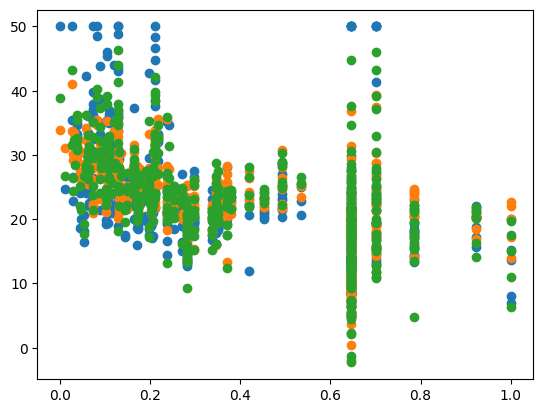

In [40]:
# Создание модели с обычным градиентным спуском
modelGD = LinearRegressionGD(lr=0.01, max_iter=400, tol=1e-3, intercept=True)

# Измерение времени обучения для обычного градиентного спуска
start_time = time.time()
stepsGD, errorsGD = modelGD.fit(X_train, y_train)
training_time_GD = time.time() - start_time

# Создание модели со стохастическим градиентным спуском
modelSGD = LinearRegressionSGD(lr=0.01, max_iter=50, batch_size=8, tol=1e-3, intercept=True)

# Измерение времени обучения для стохастического градиентного спуска
start_time = time.time()
stepsSGD, errorsSGD = modelSGD.fit(X_train, y_train)
training_time_SGD = time.time() - start_time

MSE_GD_train = modelGD.MSE(X_train, y_train)
MSE_SGD_train = modelSGD.MSE(X_train, y_train)

# Оценка качества моделей на тестовом наборе данных
MSE_GD = modelGD.MSE(X_test, y_test)
MSE_SGD = modelSGD.MSE(X_test, y_test)

# Вывод результатов
print("Сравнение скорости и качества обучения:")
print(f"Время обучения (GD): {training_time_GD} сек.")
print(f"Время обучения (SGD): {training_time_SGD} сек.")
print(f"MSE (GD)test: {MSE_GD}, MSE (GD)train : {MSE_GD_train} ")
print(f"MSE (SGD)test: {MSE_SGD}, MSE (SGD)train: {MSE_SGD_train} ")
# print("Коэффициенты (GD): ", modelGD.theta)
# print("Коэффициенты (SDG): ", modelSGD.theta)

y_pred_GD = modelGD.predict(X)
y_pred_SGD = modelSGD.predict(X)
X_numpy = X.to_numpy()  # Преобразовать DataFrame в NumPy массив
plt.scatter(X_numpy[:, 2], y)
plt.scatter(X_numpy[:, 2], y_pred_GD)
plt.scatter(X_numpy[:, 2], y_pred_SGD)

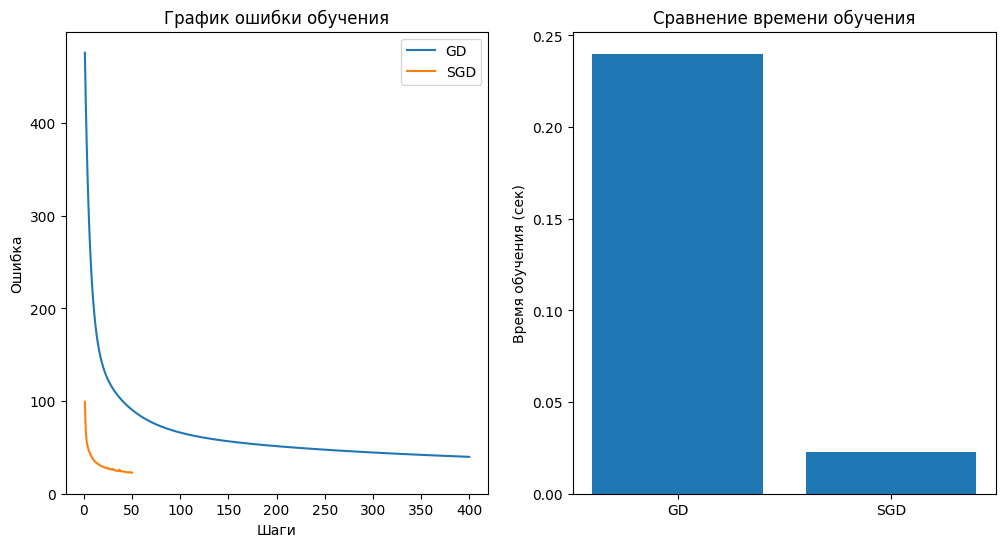

In [41]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(stepsGD, errorsGD, label='GD')
plt.plot(stepsSGD, errorsSGD, label='SGD')
plt.xlabel("Шаги")
plt.ylabel("Ошибка")
plt.legend()
plt.title("График ошибки обучения")

plt.subplot(1, 2, 2)
plt.bar(['GD', 'SGD'], [training_time_GD, training_time_SGD])
plt.ylabel("Время обучения (сек)")
plt.title("Сравнение времени обучения")
plt.show()

In [66]:
import matplotlib.pyplot as plt

batch_sizes = [1, 2, 4, 8, 16, 32]
results = []

for batch_size in batch_sizes:
    model_sgd = LinearRegressionSGD(lr=0.01, max_iter=400, batch_size=batch_size, tol=1e-3, intercept=True)
    start_time = time.time()
    steps, errors = model_sgd.fit(X_train, y_train)
    training_time = time.time() - start_time
    mse = model_sgd.MSE(X_test, y_test)
    results.append((batch_size, training_time, mse))

for batch_size, training_time, mse in results:
    print(f"Batch Size: {batch_size}, Training Time: {training_time} s, MSE: {mse}")


for batch_size, training_time, mse in results:
    plt.plot(steps, errors, label=f'Batch Size: {batch_size}')

plt.xlabel('Iterations')
plt.ylabel('Error')
plt.legend()
plt.title('Error for Different Batch Sizes')
plt.show()
